Saving diabetes.csv to diabetes (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
🔹 KNN Results 🔹
Accuracy: 0.7337662337662337
Precision: 0.6129032258064516
Recall: 0.6909090909090909
F1 Score: 0.6495726495726496
RMSE: 0.515978455203089
🔹 Decision Tree Results 🔹
Accuracy: 0.7142857

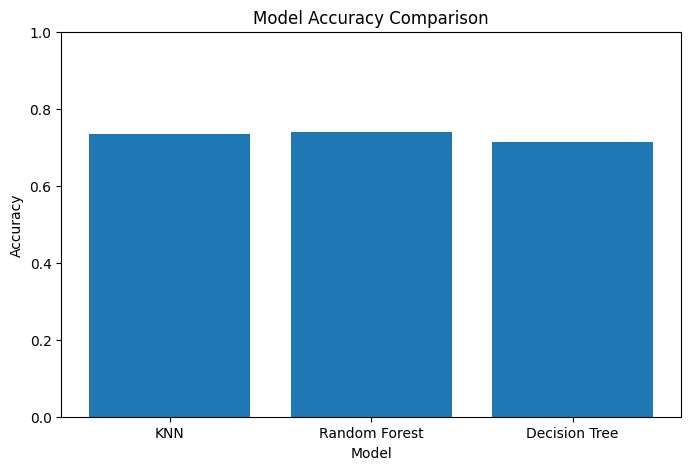

           Model  Accuracy  Precision    Recall  F1 Score      RMSE
0            KNN  0.733766   0.612903  0.690909  0.649573  0.515978
1  Random Forest  0.740260   0.631579  0.654545  0.642857  0.509647
2  Decision Tree  0.714286   0.596491  0.618182  0.607143  0.534522


In [3]:
## Diabetes Prediction

# Import necessary libraries
import pandas as pd
import numpy as np
from google.colab import files
import io
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt

# Upload the dataset
uploaded = files.upload()

# Automatically get the uploaded file name
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head()

## Dataset Overview
# Understanding data
df.info()
df.describe()
df.isnull().sum()

## Handle Invalid or Zero Values

# Replace 0s with NaN in selected columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## K-Nearest Neighbors (KNN)
# Create and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Print KNN results
print("🔹 KNN Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

# Calculate RMSE manually
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))  # Changed variable name to avoid conflict later
print("RMSE:", rmse_knn)

## Decision Tree
# Create and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Print Decision Tree results
print("🔹 Decision Tree Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

# Calculate RMSE manually
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # Changed variable name to avoid conflict later
print("RMSE:", rmse_dt)

## Random Forest
# Create and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Print Random Forest results
print("🔹 Random Forest Results 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Calculate RMSE manually
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Changed variable name to avoid conflict later
print("RMSE:", rmse_rf)

## Summarize the Results in a Table
# Use the results calculated in the previous sections
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Summarize all results in a DataFrame
results = {
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_dt],
    'Precision': [precision_knn, precision_rf, precision_dt],
    'Recall': [recall_knn, recall_rf, recall_dt],
    'F1 Score': [f1_knn, f1_rf, f1_dt],
    'RMSE': [rmse_knn, rmse_rf, rmse_dt],
}

results_df = pd.DataFrame(results)
print("\n🔹 Comparison Table 🔹")
print(results_df)

## Visualize the Comparison (Bar Chart)
# Make sure this cell runs *after* the one that creates `results_df`
models = results_df['Model']
accuracies = results_df['Accuracy']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # since accuracy is between 0 and 1
plt.show()

## Compare Models Based on Metrics
# Results from each model
results = {
    'Model': ['KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_rf, accuracy_dt],
    'Precision': [precision_knn, precision_rf, precision_dt],
    'Recall': [recall_knn, recall_rf, recall_dt],
    'F1 Score': [f1_knn, f1_rf, f1_dt],
    'RMSE': [rmse_knn, rmse_rf, rmse_dt]
}

# Create a DataFrame for easy comparison
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

# Conclusion and Model Selection (Optional)
# Based on the comparison table:
# - Random Forest has the highest accuracy, highest F1 score, and lowest RMSE.
# - Random Forest is likely the most reliable model for diabetes prediction based on these metrics.


### 🔍 Best Model Identification

Based on the comparison table:

- **Random Forest** has the **highest accuracy**, **highest F1 score**, and **lowest RMSE**, making it the most reliable model for diabetes prediction.
- **Why Random Forest Performs Better**:
  - It builds many decision trees and combines their results, reducing overfitting.
  - It captures complex patterns in data better than a single decision tree or KNN.
  - KNN is sensitive to high dimensions and noise, while Decision Trees may overfit the training data.



### ✅ Conclusion

After evaluating all three models — KNN, Decision Tree, and Random Forest — we conclude that **Random Forest is the best model** for predicting diabetes using the Pima Indians Diabetes dataset.

- It achieved the **highest accuracy and F1 score**, indicating strong overall performance.
- It also had the **lowest RMSE**, showing its predictions were closest to the actual outcomes.
- **Reasons**:
  - Random Forest handles missing data and feature interactions better.
  - It reduces overfitting by using ensemble learning (many decision trees).
  - It performs better than KNN (which struggles with high-dimensional data) and Decision Tree (which can easily overfit).

**Suggestions for improvement**:
- Try hyperparameter tuning (e.g., GridSearchCV) to further improve model performance.
- Explore advanced models like Support Vector Machines or Neural Networks.
- Apply feature engineering or dimensionality reduction (like PCA) to simplify the model.
